<a href="https://colab.research.google.com/github/nurdankar/RecurrentNeuralNetwork_With_Keras/blob/master/RNN_With_IMDB_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB VERİ KÜMESİNDE YİNELEMELİ SİNİR AĞI OLUŞTURMA VE EĞİTME

## Kimlik Doğrulama ve Dosya Kontrolü

In [22]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AHw7J3GccfOl8tmF9gPk7kppGbhpjQtIqpVVU-OKjQIZ6jVFcRPF7o
Mounted at /gdrive
/gdrive


In [23]:
import os
os.chdir('/gdrive/My Drive/Calısma_Ortamı/YinelemeliSinirAğları')
!ls

Basic_RNN.ipynb  RNN_With_IMDB_DataSet.ipynb


## Gerekli Kütüphanelerin Yüklenmesi

In [24]:
from keras.layers import SimpleRNN

In [25]:
from keras.models import Sequential
from keras.layers import Embedding

## 1. Bir RNN Katmanı

In [26]:
model = Sequential()
model.add(Embedding(1000, 32))     # Giriş Katmanı
model.add(SimpleRNN(32))           # Son Katman
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


## 2. Boyutlandırılmış RNN Katmanı

In [27]:
model = Sequential()
model.add(Embedding(1000, 32))   
model.add(SimpleRNN(32, return_sequences = True))  
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


## 3. Ardışık RNN Katmanları

In [28]:
model = Sequential()
model.add(Embedding(1000, 32))   
model.add(SimpleRNN(32, return_sequences = True))  
model.add(SimpleRNN(32, return_sequences = True))  
model.add(SimpleRNN(32, return_sequences = True))  
model.add(SimpleRNN(32, return_sequences = True))  
model.add(SimpleRNN(32, ))  
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 42,400
Trainable params: 42,400
Non-trainable params: 0
__________________________________________________

#IMDB VERİ KÜMESİNİ HAZIRLAMAK

In [29]:
from keras.datasets import imdb
from keras_preprocessing import sequence

In [30]:
num_features = 1000
maxlen = 500
batch_size = 32

In [31]:
print('Load data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_features)

Load data...


In [32]:
print('pad sequence ( sample x train)')

input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)


pad sequence ( sample x train)


In [33]:
print(len(input_train), 'Eğitim dizisi', input_train.shape)
print(len(input_test), 'Test dizisi', input_test.shape)

25000 Eğitim dizisi (25000, 500)
25000 Test dizisi (25000, 500)


# EMBEDDING VE SimpleRNN/LSTM KATMANININ EĞİTİLMESİ

In [34]:
from keras.layers import Dense
from keras import layers

## Basit Bir RNN İle Modelleme

In [37]:
model = Sequential()
model.add(Embedding(num_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________


## Basit Bir LSTM İle Modelleme

In [47]:
model = Sequential()
model.add(layers.Embedding(num_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 48,705
Trainable params: 48,705
Non-trainable params: 0
_________________________________________________________________


## RNN İçin Modelin Derlenmesi

In [38]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(input_train, y_train, 
                    epochs = 10, 
                    batch_size = 128, 
                    validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 55s 348ms/step - loss: 0.6565 - acc: 0.5968 - val_loss: 0.5386 - val_acc: 0.7518
Epoch 2/10
157/157 [==============================] - 55s 351ms/step - loss: 0.4812 - acc: 0.7825 - val_loss: 0.4581 - val_acc: 0.7896
Epoch 3/10
157/157 [==============================] - 55s 351ms/step - loss: 0.3990 - acc: 0.8280 - val_loss: 0.4687 - val_acc: 0.7716
Epoch 4/10
157/157 [==============================] - 55s 353ms/step - loss: 0.3724 - acc: 0.8415 - val_loss: 0.3872 - val_acc: 0.8434
Epoch 5/10
157/157 [==============================] - 55s 353ms/step - loss: 0.3795 - acc: 0.8430 - val_loss: 0.4833 - val_acc: 0.7542
Epoch 6/10
157/157 [==============================] - 55s 350ms/step - loss: 0.3434 - acc: 0.8525 - val_loss: 0.4227 - val_acc: 0.8320
Epoch 7/10
157/157 [==============================] - 56s 357ms/step - loss: 0.3361 - acc: 0.8631 - val_loss: 0.4393 - val_acc: 0.8100
Epoch 8/10
157/157 [==============================] - 5

## LSTM İçin Modelin Derlenmesi

In [48]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 8s 50ms/step - loss: 0.5624 - acc: 0.7193 - val_loss: 0.4955 - val_acc: 0.7966
Epoch 2/10
157/157 [==============================] - 7s 45ms/step - loss: 0.3963 - acc: 0.8357 - val_loss: 0.4450 - val_acc: 0.8196
Epoch 3/10
157/157 [==============================] - 7s 45ms/step - loss: 0.3611 - acc: 0.8486 - val_loss: 0.4175 - val_acc: 0.8100
Epoch 4/10
157/157 [==============================] - 7s 46ms/step - loss: 0.3482 - acc: 0.8533 - val_loss: 0.5087 - val_acc: 0.8038
Epoch 5/10
157/157 [==============================] - 7s 46ms/step - loss: 0.3350 - acc: 0.8619 - val_loss: 0.3830 - val_acc: 0.8322
Epoch 6/10
157/157 [==============================] - 7s 46ms/step - loss: 0.3275 - acc: 0.8646 - val_loss: 0.4158 - val_acc: 0.8470
Epoch 7/10
157/157 [==============================] - 7s 48ms/step - loss: 0.3190 - acc: 0.8680 - val_loss: 0.3306 - val_acc: 0.8558
Epoch 8/10
157/157 [==============================] - 7s 46ms/step - 

# RNN İÇİN SONUÇLARIN ÇİZDİRİLMESİ

In [39]:
import matplotlib.pyplot as plt

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [41]:
epochs = range(1, len(acc) + 1)

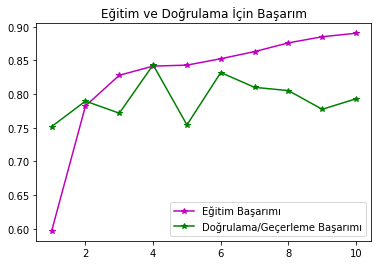

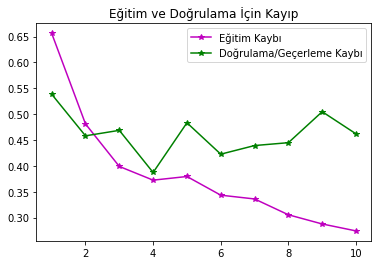

In [42]:
plt.plot(epochs, acc, 'm*-', label = 'Eğitim Başarımı')
plt.plot(epochs, val_acc, 'g*-', label = 'Doğrulama/Geçerleme Başarımı')
plt.title('Eğitim ve Doğrulama İçin Başarım')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'm*-', label = 'Eğitim Kaybı')
plt.plot(epochs, val_loss, 'g*-', label = 'Doğrulama/Geçerleme Kaybı')
plt.title('Eğitim ve Doğrulama İçin Kayıp')
plt.legend()

plt.show()

In [43]:
print(acc, 'Eğitim Başarımı')

[0.5968000292778015, 0.7824500203132629, 0.8279500007629395, 0.8415499925613403, 0.8429999947547913, 0.8525000214576721, 0.863099992275238, 0.8760499954223633, 0.8851500153541565, 0.8903499841690063] Eğitim Başarımı


In [44]:
print(val_acc, 'Doğrulama/Geçerleme Başarımı')

[0.751800000667572, 0.7896000146865845, 0.7716000080108643, 0.8434000015258789, 0.7541999816894531, 0.8320000171661377, 0.8100000023841858, 0.8051999807357788, 0.777400016784668, 0.7929999828338623] Doğrulama/Geçerleme Başarımı


In [45]:
print(loss, 'Eğitim Kaybı')

[0.6564896702766418, 0.4811919331550598, 0.3989596664905548, 0.3724236488342285, 0.37948787212371826, 0.3433917462825775, 0.33605092763900757, 0.30546867847442627, 0.28770750761032104, 0.27426373958587646] Eğitim Kaybı


In [46]:
print(val_loss, 'Doğrulama/Geçerleme Kaybı')

[0.5386369228363037, 0.45812949538230896, 0.46873775124549866, 0.38722556829452515, 0.48333740234375, 0.4226573705673218, 0.43934282660484314, 0.44488397240638733, 0.504797637462616, 0.46191275119781494] Doğrulama/Geçerleme Kaybı


# LSTM İÇİN SONUÇLARIN ÇİZDİRİLMESİ

In [49]:
import matplotlib.pyplot as plt

In [50]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [51]:
epochs = range(1, len(acc) + 1)

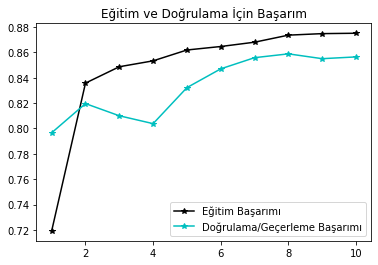

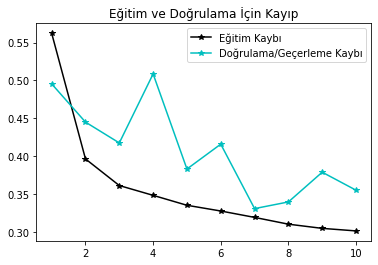

In [70]:
plt.plot(epochs, acc, 'k*-', label = 'Eğitim Başarımı')
plt.plot(epochs, val_acc, 'c*-', label = 'Doğrulama/Geçerleme Başarımı')
plt.title('Eğitim ve Doğrulama İçin Başarım')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'k*-', label = 'Eğitim Kaybı')
plt.plot(epochs, val_loss, 'c*-', label = 'Doğrulama/Geçerleme Kaybı')
plt.title('Eğitim ve Doğrulama İçin Kayıp')
plt.legend()

plt.show()

In [53]:
print(acc, 'Eğitim Başarımı')

[0.7192500233650208, 0.8357499837875366, 0.8486499786376953, 0.8532999753952026, 0.8618500232696533, 0.8646000027656555, 0.8679999709129333, 0.8735499978065491, 0.874750018119812, 0.8750500082969666] Eğitim Başarımı


In [55]:
print(val_acc, 'Doğrulama/Geçerleme Başarımı')

[0.7965999841690063, 0.819599986076355, 0.8100000023841858, 0.8037999868392944, 0.8321999907493591, 0.847000002861023, 0.8557999730110168, 0.8587999939918518, 0.8550000190734863, 0.8564000129699707] Doğrulama/Geçerleme Başarımı


In [56]:
print(loss, 'Eğitim Kaybı')

[0.5624496340751648, 0.3963117301464081, 0.36112573742866516, 0.34815770387649536, 0.3350328505039215, 0.32746031880378723, 0.3190133571624756, 0.31005024909973145, 0.3045118749141693, 0.3011394441127777] Eğitim Kaybı


In [57]:
print(val_loss, 'Doğrulama/Geçerleme Kaybı')

[0.49554476141929626, 0.4449927806854248, 0.41745424270629883, 0.5086711049079895, 0.3829655647277832, 0.4158337414264679, 0.33064383268356323, 0.3394484221935272, 0.37876418232917786, 0.3549569249153137] Doğrulama/Geçerleme Kaybı


# REFERANSLAR

1. Merve Ayyüce Kızrak, Keras_ile_Derin_Ogrenmeye_Giris, GitHub Repository





